# ROMY Status File

In [75]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import obspy as obs
import matplotlib.colors

from pandas import DataFrame, merge
from andbro__save_to_pickle import __save_to_pickle

In [76]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [77]:
from functions.load_beat import __load_beat
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals

## Configurations

In [78]:
config = {}


config['tbeg'] = obs.UTCDateTime("2023-09-01")
config['tend'] = obs.UTCDateTime("2023-09-30")

config['ring'] = "U"

config['path_to_figures'] = archive_path+f"romy_plots/{config['tbeg'].year}/R{config['ring']}/status/"

config['path_to_data'] = archive_path+f"temp_archive/"


### Load Status Data

In [79]:
from functions.load_status import __load_status

In [80]:
statusU = __load_status(config['tbeg'], config['tend'], "U", config['path_to_data'])

 -> no such file: 2023/BW/RU/RU_2023-09-07_status.pkl
 -> no such file: 2023/BW/RU/RU_2023-09-27_status.pkl


In [81]:
statusU[statusU.times_utc > obs.UTCDateTime("2023-09-06 23:59")]

,times_utc,times_utc_sec,quality,fsagnac,mlti,ac_threshold,dc_threshold
2,2023-09-06T23:59:30.000000Z,518370.0,1.0,1.0,1.0,1.0,1.0
0,2023-09-07T00:00:30.000000Z,518430.0,NaN,NaN,NaN,NaN,NaN
1,2023-09-07T00:01:30.000000Z,518490.0,NaN,NaN,NaN,NaN,NaN
2,2023-09-07T00:02:30.000000Z,518550.0,NaN,NaN,NaN,NaN,NaN
3,2023-09-07T00:03:30.000000Z,518610.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1438,2023-09-29T23:55:30.000000Z,2505330.0,0.0,0.0,1.0,0.0,1.0
1439,2023-09-29T23:56:30.000000Z,2505390.0,0.0,0.0,1.0,0.0,1.0
0,2023-09-29T23:57:30.000000Z,2505450.0,0.0,0.0,1.0,0.0,1.0
1,2023-09-29T23:58:30.000000Z,2505510.0,0.0,0.0,1.0,0.0,1.0


In [82]:
statusV = __load_status(config['tbeg'], config['tend'], "V", config['path_to_data'])

 -> no such file: 2023/BW/RV/RV_2023-09-07_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-08_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-09_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-10_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-17_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-18_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-19_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-21_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-25_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-26_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-27_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-28_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-29_status.pkl
 -> no such file: 2023/BW/RV/RV_2023-09-30_status.pkl


In [83]:
statusZ = __load_status(config['tbeg'], config['tend'], "Z", config['path_to_data'])

 -> no such file: 2023/BW/RZ/RZ_2023-09-04_status.pkl
 -> no such file: 2023/BW/RZ/RZ_2023-09-05_status.pkl
 -> no such file: 2023/BW/RZ/RZ_2023-09-07_status.pkl
 -> no such file: 2023/BW/RZ/RZ_2023-09-10_status.pkl
 -> no such file: 2023/BW/RZ/RZ_2023-09-23_status.pkl
 -> no such file: 2023/BW/RZ/RZ_2023-09-24_status.pkl
 -> no such file: 2023/BW/RZ/RZ_2023-09-25_status.pkl
 -> no such file: 2023/BW/RZ/RZ_2023-09-28_status.pkl
 -> no such file: 2023/BW/RZ/RZ_2023-09-29_status.pkl


### Define Variables

### Plotting

In [84]:
def __makelplot_single_status(df):

    names = ["quality", "fsagnac", "mlti", "ac_threshold", "dc_threshold"]
    bars = np.ones(len(names))-0.5

    arr = np.ones((len(names), df['quality'].size))

    for _n, name in enumerate(names):
        arr[_n] *= df[name]

    time_scaling = 1/86400

    cmap = matplotlib.colors.ListedColormap(['darkred', 'green'])

    fig = plt.figure(figsize=(15, 4))

    c = plt.pcolormesh(df.times_utc_sec*time_scaling, names, arr, cmap=cmap, rasterized=True, alpha=0.8)

    for _k, bar in enumerate(bars):
        plt.axhline(bar+_k, color="k", alpha=0.5)

    plt.xlabel("Time (days)")

    plt.title(f"Quality Status from {config['tbeg'].date}")

    plt.show();
    return fig

/tmp/ipykernel_90837/604576591.py:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = plt.pcolormesh(df.times_utc_sec*time_scaling, names, arr, cmap=cmap, rasterized=True, alpha=0.8)


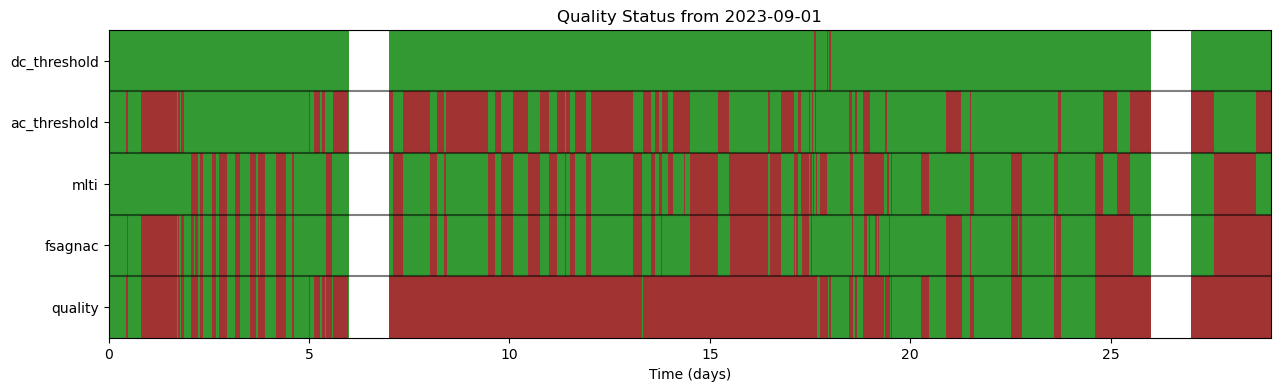

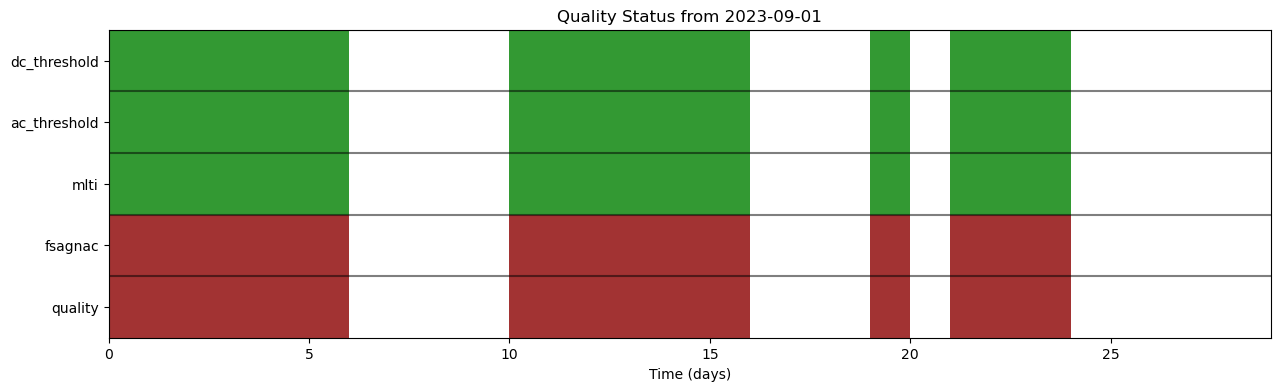

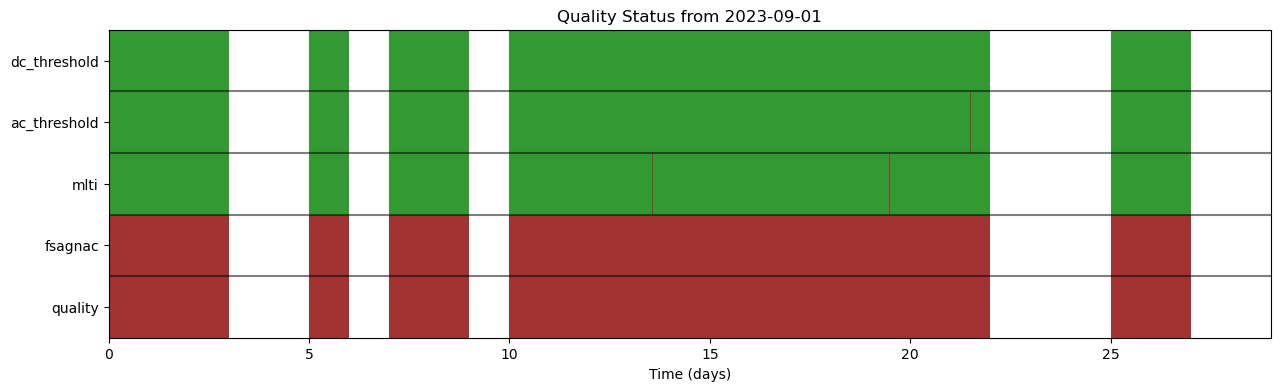

In [85]:
fig = __makelplot_single_status(statusU)
fig = __makelplot_single_status(statusV)
fig = __makelplot_single_status(statusZ)


# print(f" -> stored: {config['path_to_figures']}R{config['ring']}_{config['tbeg'].date}_status.png")
# fig.savefig(config['path_to_figures']+f"R{config['ring']}_{config['tbeg'].date}_status.png", format="png", dpi=100, bbox_inches='tight')

In [86]:
statusZ_mod = statusZ[['times_utc','quality']]
statusU_mod = statusU[['times_utc','quality']]
statusV_mod = statusV[['times_utc','quality']]


statusZ_mod = statusZ_mod.dropna(subset="times_utc").reset_index()
statusV_mod = statusV_mod.dropna(subset="times_utc").reset_index()
statusU_mod = statusU_mod.dropna(subset="times_utc").reset_index()

statusZ_mod.shape, statusU_mod.shape, statusV_mod.shape

((125325, 3), (126720, 3), (40440, 3))

In [87]:
statusZ_mod['times_utc'] = statusZ_mod.times_utc.astype(str)
statusU_mod['times_utc'] = statusU_mod.times_utc.astype(str)
statusV_mod['times_utc'] = statusV_mod.times_utc.astype(str)

In [88]:

df_new = statusZ_mod.copy()

df_new = df_new.merge(statusU_mod, how="outer", on=["times_utc"])
df_new = df_new.merge(statusV_mod, how="outer", on=["times_utc"])

df_new.drop(columns=["index_x", "index_y", "index"], inplace=True)

df_new.rename(columns={"quality_x":"RU", "quality_y":"RV", "quality":"RZ"}, inplace=True)

df_new

,times_utc,RU,RV,RZ
0,2023-09-01T00:00:30.000000Z,0.0,1.0,0.0
1,2023-09-01T00:01:30.000000Z,0.0,1.0,0.0
2,2023-09-01T00:02:30.000000Z,0.0,1.0,0.0
3,2023-09-01T00:03:30.000000Z,0.0,1.0,0.0
4,2023-09-01T00:04:30.000000Z,0.0,1.0,0.0
...,...,...,...,...
128188,2023-09-19T23:52:30.000000Z,NaN,NaN,NaN
128189,2023-09-19T23:53:30.000000Z,NaN,NaN,NaN
128190,2023-09-19T23:54:30.000000Z,NaN,NaN,NaN
128191,2023-09-19T23:55:30.000000Z,NaN,NaN,NaN


In [ ]:
df_all = DataFrame()

In [ ]:
def __makelplot_all_status(df1, df2, df3, df4):

    bars = np.ones(4)-0.5

    arr = np.ones((4, df1['quality'].size))
    for df in [df1, df2, df3, df4]:
        for _n, name in enumerate(["RZ", "RU", "RV", "RW"]):
            arr[_n] *= df['quality']

    time_scaling = 1/86400

    cmap = matplotlib.colors.ListedColormap(['darkred', 'green'])

    fig = plt.figure(figsize=(15, 4))

    c = plt.pcolormesh(df.times_utc_sec*time_scaling, names, arr, cmap=cmap, rasterized=True, alpha=0.8)

    for _k, bar in enumerate(bars):
        plt.axhline(bar+_k, color="k", alpha=0.5)

    plt.xlabel("Time (days)")

    plt.title(f"Quality Status of R{config['ring']} on {config['tbeg'].date}")

    plt.show();
    return fig


__makelplot_all_status(statusZ, statusU, statusV, statusU)